In [1]:
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint

call_url = 'https://api.stocktwits.com/api/2/streams/symbol/AAPL.json'

In [3]:
company_info = pd.read_pickle('company_data.pickle')

In [4]:
company_info.head

<bound method NDFrame.head of      Symbol                                               Name LastSale  \
0      AAPL                                         Apple Inc.   155.15   
1     GOOGL                                      Alphabet Inc.  1007.71   
2      GOOG                                      Alphabet Inc.  1001.52   
3      MSFT                              Microsoft Corporation    85.01   
4      AMZN                                   Amazon.com, Inc.   1350.5   
5        FB                                     Facebook, Inc.   171.58   
6       TIG                                            TiGenix  41.9537   
7      INTC                                  Intel Corporation    42.75   
8      CSCO                                Cisco Systems, Inc.    38.77   
9     CMCSA                                Comcast Corporation    38.19   
10      PEP                                      Pepsico, Inc.   110.15   
11     NVDA                                 NVIDIA Corporation   217.5

In [5]:
AAPL_Call = requests.get('https://api.stocktwits.com/api/2/streams/symbol/AAPL.json')

In [6]:
print(AAPL_Call)

<Response [200]>


In [7]:
AAPL_Parsed = json.loads(AAPL_Call.text)

In [8]:
for x in AAPL_Parsed:
    print(x)

response
symbol
cursor
messages


In [9]:
print(AAPL_Parsed['response'])

{'status': 200}


In [10]:
print(AAPL_Parsed['symbol'])

{'id': 686, 'symbol': 'AAPL', 'title': 'Apple Inc.', 'is_following': False, 'watchlist_count': 208997}


In [11]:
print(AAPL_Parsed['cursor'])

{'more': True, 'since': 112824145, 'max': 112820491}


In [12]:
print(len(AAPL_Parsed['messages']))
pprint(AAPL_Parsed['messages'][0])
pprint(AAPL_Parsed['messages'][29])
#### Message 0 is the most recent, 29 is the oldest
#### Use Message 29 for user ID


30
{'body': '$AAPL Jim carrey buying',
 'created_at': '2018-02-13T17:34:49Z',
 'entities': {'sentiment': {'basic': 'Bullish'}},
 'id': 112824145,
 'mentioned_users': [],
 'source': {'id': 2269,
            'title': 'StockTwits Web',
            'url': 'https://stocktwits.com'},
 'symbols': [{'id': 686,
              'is_following': False,
              'symbol': 'AAPL',
              'title': 'Apple Inc.',
              'watchlist_count': 208993}],
 'user': {'avatar_url': 'http://avatars.stocktwits.com/images/default_avatar_thumb.jpg',
          'avatar_url_ssl': 'https://s3.amazonaws.com/st-avatars/images/default_avatar_thumb.jpg',
          'classification': [],
          'followers': 7,
          'following': 2,
          'id': 1328302,
          'ideas': 2039,
          'identity': 'User',
          'join_date': '2017-12-21',
          'like_count': 1203,
          'name': 'EQUIFKT',
          'official': False,
          'username': 'EQUIFKT',
          'watchlist_stocks_count': 1

In [13]:
req_two = requests.get('https://api.stocktwits.com/api/2/streams/symbol/AAPL.json?max=112513950')

In [14]:
print(req_two)

<Response [200]>


In [15]:
json_two = json.loads(req_two.text)

pprint(json_two['messages'][0])
pprint(json_two['messages'][29])

{'body': '$AAPL Why would you buy apple right now? Looks like a bunch of '
         'lemmings walking off a cliff.',
 'conversation': {'in_reply_to_message_id': None,
                  'parent': True,
                  'parent_message_id': 112513648,
                  'replies': 3},
 'created_at': '2018-02-09T23:28:14Z',
 'entities': {'chart': {'large': 'https://charts.stocktwits.com/production/large_112513648.PNG',
                        'original': 'https://charts.stocktwits.com/production/original_112513648.PNG',
                        'thumb': 'https://charts.stocktwits.com/production/small_112513648.PNG',
                        'url': 'https://charts.stocktwits.com/production/original_112513648.PNG'},
              'sentiment': None},
 'id': 112513648,
 'likes': {'total': 2, 'user_ids': [1405453, 1190648]},
 'mentioned_users': [],
 'source': {'id': 2269,
            'title': 'StockTwits Web',
            'url': 'https://stocktwits.com'},
 'symbols': [{'id': 686,
              '

In [16]:
twits_columns = ['Symbols','Time','Body','']
twits_frame = pd.dataframe(c)

AttributeError: module 'pandas' has no attribute 'dataframe'

In [6]:
init_call = requests.get('https://api.stocktwits.com/api/2/streams/symbol/AAPL.json?limit=1')
init_call = json.loads(init_call.text)
max_id = init_call['messages'][0]
max_id = max_id['id']

In [7]:
twit_count = 5
url_base = 'https://api.stocktwits.com/api/2/streams/symbol/AAPL.json?max='
count_url = '&limit=30'
tweet_data = []
for x in range(twit_count):
    api_url = url_base+str(max_id)+count_url
    api_call = requests.get(api_url)
    api_json = json.loads(api_call.text)
    tweet_data.append(api_json)
    max_id = api_json['messages'][-1]['id']
    

In [2]:
#pprint([x for x in tweet_data[0]])
'''
for x in range(tweet_data[0]):
    print(x)
    for y in tweet_data[0][x]:
        print('   '+str(y))
        print('\n')
'''
url_base = 'https://api.stocktwits.com/api/2/streams/symbol/AAPL.json?limit=30'
api_call = requests.get(url_base)
api_json = json.loads(api_call.text)
pprint(api_json)

{'cursor': {'max': 112894978, 'more': True, 'since': 112904421},
 'messages': [{'body': '$SPY $QQQ $IWM $FB $AAPL $AMZN $GOOG $MSFT '
                       'https://www.youtube.com/watch?v=37yH6I2W954',
               'created_at': '2018-02-14T04:20:19Z',
               'entities': {'sentiment': {'basic': 'Bullish'}},
               'id': 112904421,
               'likes': {'total': 1, 'user_ids': [356924]},
               'links': [{'created_at': '2018-02-14T04:20:19Z',
                          'description': "Becoming a millionaire isn't rocket "
                                         'science. By investing $5,500 into '
                                         'your Roth ira annually you will have '
                                         'over a million dollars cash tax free '
                                         "by the time you retire. Roth ira's "
                                         "aren't complicated-YOU choose which "
                                         'in

              {'body': '$AAPL estimates distribution - here’s what 230 '
                       'Estimize analysts are expecting $AAPL to report for Q2 '
                       '[Reporting 05/01 AMC]\n'
                       'http://www.estimize.com/intro/aapl?chart=scatter-plot&amp;metric_name=eps&amp;utm_content=AAPL&amp;utm_medium=distribution&amp;utm_source=stocktwits',
               'created_at': '2018-02-14T02:30:04Z',
               'entities': {'chart': {'large': 'https://charts.stocktwits.com/production/large_112896339.png',
                                      'original': 'https://charts.stocktwits.com/production/original_112896339.png',
                                      'thumb': 'https://charts.stocktwits.com/production/small_112896339.png',
                                      'url': 'https://charts.stocktwits.com/production/original_112896339.png'},
                            'sentiment': None},
               'id': 112896339,
               'links': [{'created_at

In [10]:
pprint(api_json['messages'][0]['symbols'][0])
pprint(api_json['messages'][0]['symbols'][1])
pprint(api_json['messages'][0]['symbols'][0]['symbol'])







{'id': 686,
 'is_following': False,
 'symbol': 'AAPL',
 'title': 'Apple Inc.',
 'watchlist_count': 209186}
{'id': 864,
 'is_following': False,
 'symbol': 'AMZN',
 'title': 'Amazon.com Inc.',
 'watchlist_count': 125985}
'AAPL'


In [54]:
api_json = json.loads(api_call.text)
#pprint(api_json['messages'])
for x in api_json['messages']:
    print(x['body'])


$AAPL wonder if something happened in shareholder meeting going on now?
$AAPL Price surge on a more positive outlook by CEO Tim Cook.
$AAPL looking better, any news from shareholders meeting ?
BTO $AAPL 167.5c .51
$AAPL new intraday high. Squeeze baby !!
$AAPL   Short covering stop loss dominoes engage
$AAPL anticlimatic show me the bum rush move
$AAPL shorts. Heads up. Shorting here. U will get burnt bad
$aapl 164 huge area if builds can go
$AAPL show me $165
$AAPL hod. $SPY turned green..  Oil turned green , Nasdaq green . Hope  $DIA turning green . Time to cover your shorts ! don&#39;t be greedy .
$AAPL special dividend is unlikely and this goes up?  makes sense.  actually does
$AAPL 164 major level of people who can get bum rushed over
$AAPL already have movie rental services and still can’t figure out how to convert millions of iTunes Customers in monthly revenue stream!
$AAPL 164 coming up
$AMAT Oversold and Undervalued, Strong growth in earnings and ROE of 42%, upside of 30.5%.$

In [37]:
pprint(api_call._content)

(b'{"response":{"status":200},"symbol":{"id":686,"symbol":"AAPL","title":"Apple'
 b' Inc.","is_following":false,"watchlist_count":209005},"cursor":{"more":true,'
 b'"since":112832176,"max":112831324},"messages":[{"id":112832176,"body":"$AAPL'
 b' wonder if something happened in shareholder meeting going on now?","created'
 b'_at":"2018-02-13T18:25:25Z","user":{"id":859121,"username":"bobky","name":"b'
 b'ob Tyler","avatar_url":"https://avatars.stocktwits.com/production/859121/thu'
 b'mb-1517491662.png","avatar_url_ssl":"https://avatars.stocktwits.com/producti'
 b'on/859121/thumb-1517491662.png","join_date":"2016-10-13","official":false,"i'
 b'dentity":"User","classification":[],"followers":48,"following":12,"ideas":72'
 b'32,"watchlist_stocks_count":6,"like_count":10000},"source":{"id":1149,"title'
 b'":"StockTwits for iOS","url":"http://www.stocktwits.com/mobile"},"symbols":['
 b'{"id":686,"symbol":"AAPL","title":"Apple Inc.","is_following":false,"watchli'
 b'st_count":209005}],"menti

In [23]:
pprint([c for c in tweet_data[0]['messages'][0]])
#tweet_data[0]['messages'][0] 
#This is the 0th entry of the actual data with the following keys
'''
['id' - tweet ID,
 'body' - text of tweet,
 'created_at' - time created '2018-02-12T21:22:46Z',
 'user' - Data about user,
 'source',
 'symbols - list of symbols'
 {'id': 686,
  'is_following': False,
  'symbol': 'AAPL',
  'title': 'Apple Inc.',
  'watchlist_count': 208752},
 'links' - links in the tweet,
 'mentioned_users',
 'entities']
'''

['id',
 'body',
 'created_at',
 'user',
 'source',
 'symbols',
 'mentioned_users',
 'entities']


"\n['id' - tweet ID,\n 'body' - text of tweet,\n 'created_at' - time created '2018-02-12T21:22:46Z',\n 'user' - Data about user,\n 'source',\n 'symbols - list of symbols'\n {'id': 686,\n  'is_following': False,\n  'symbol': 'AAPL',\n  'title': 'Apple Inc.',\n  'watchlist_count': 208752},\n 'links' - links in the tweet,\n 'mentioned_users',\n 'entities']\n"

In [24]:
pprint(len(tweet_data[0]['messages']))

30


In [25]:
cu = 0
x_cu = 0
symbols = []
for x in tweet_data:
    for y in range(len(x['messages'])):
        symbol_json = x['messages'][y]['symbols']
        if len(symbol_json) > 1:
            symbols.append(symbol_json)

In [26]:
print(len(tweet_data))

5


In [27]:
print(len(tweet_data[0]))

4


In [30]:
pprint(symbols[0])

[{'id': 686,
  'is_following': False,
  'symbol': 'AAPL',
  'title': 'Apple Inc.',
  'watchlist_count': 208993},
 {'id': 3012,
  'is_following': False,
  'symbol': 'ORCL',
  'title': 'Oracle Corp.',
  'watchlist_count': 9037},
 {'id': 5786,
  'is_following': False,
  'symbol': 'IBM',
  'title': 'International Business Machines Corp.',
  'watchlist_count': 22628},
 {'id': 7871,
  'is_following': False,
  'symbol': 'FB',
  'title': 'Facebook',
  'watchlist_count': 133792},
 {'id': 7872,
  'is_following': False,
  'symbol': 'TWTR',
  'title': 'Twitter',
  'watchlist_count': 93990}]


In [31]:
import plotly
plotly.tools.set_credentials_file(username='cforte7', api_key='pDXUE7Q9ulBh78xlY3xi')


In [32]:
import networkx as nx

In [33]:
G = nx.Graph()

In [34]:
G.add_node(1)
G.add_node(2)
G.add_node(3)

In [35]:
G.add_edge(1,2)

In [36]:
G.number_of_nodes()

3

In [37]:
G.number_of_edges()

1

In [43]:
nx.draw(G)

In [40]:
import matplotlib.pyplot as plt

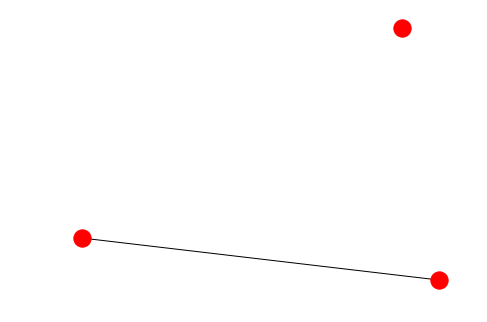

In [44]:
plt.show()

In [65]:
init_call = requests.get('https://api.stocktwits.com/api/2/streams/symbol/AAPL.json?limit=1')
init_call = json.loads(init_call.text)
max_id = init_call['messages'][0]['id'] #paramter fed to API to call only ID's older than this

twit_count = 1 #Number of sets of 30 tweets to download
url_base = 'https://api.stocktwits.com/api/2/streams/symbol/AAPL.json?max='
count_url = '&limit=30'
df_columns = ['id','body','created_at','id','symbols']
tweet_container = []
for x in range(twit_count):
    api_url = url_base+str(max_id)+count_url
    api_call = requests.get(api_url)
    api_json = json.loads(api_call.text)
    symbol_called = api_json['symbol']['symbol']
    for y in api_json['messages']:
        tweet_body = y['body']
        tweet_time = y['created_at']
        tweet_id = y['id']
        tweet_symbols = y['symbols']
        tweet_container.append([symbol_called,tweet_body,tweet_time,tweet_id,tweet_symbols])
    max_id = api_json['messages'][-1]['id']
    
    tweetFrame = pd.DataFrame(data=tweet_container,columns=df_columns)

In [69]:
import datetime
print(datetime.datetime.now().date())

2018-02-13


In [64]:
print(tweet_container[0])

['AAPL', '$AAPL they are so annoying with that', '2018-02-13T18:27:17Z', 112832534, [{'id': 686, 'symbol': 'AAPL', 'title': 'Apple Inc.', 'is_following': False, 'watchlist_count': 209007}]]


In [74]:
current_time = datetime.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')
#file_time = str(current_time.time())+'_'+str(current_time.date())
path = 'Tweet_Frame_'+current_time
print(path)

Tweet_Frame_2018-02-13_12:55:20
